In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [307]:
#path of the new dataset
path='./TCIA_new'

In [308]:
#our patient list to DataFrame
new=pd.DataFrame(os.listdir('./TCIA_old'),columns=['PatientID'])

In [309]:
#load csv file and select columns
org=pd.read_csv('./NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv',sep=',')
org=org[['PatientID','age', 'clinical.T.Stage', 'Clinical.N.Stage','Histology', 'gender', 'Survival.time']]

In [310]:
#merge org with new , key='PatientID'
new=pd.merge(org,new,on='PatientID')

In [311]:
new

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Histology,gender,Survival.time
0,LUNG1-004,70.8802,2.0,1,squamous cell carcinoma,male,141
1,LUNG1-005,80.4819,4.0,2,squamous cell carcinoma,male,353
2,LUNG1-006,73.8864,3.0,1,squamous cell carcinoma,male,173
3,LUNG1-007,81.5288,2.0,2,squamous cell carcinoma,male,137
4,LUNG1-008,71.6660,2.0,2,adenocarcinoma,male,77
...,...,...,...,...,...,...,...
95,LUNG1-285,63.5318,2.0,2,adenocarcinoma,male,303
96,LUNG1-288,62.2505,1.0,3,adenocarcinoma,male,154
97,LUNG1-290,60.0986,2.0,3,squamous cell carcinoma,female,321
98,LUNG1-292,66.2149,4.0,4,squamous cell carcinoma,male,232


In [312]:
survival_month=[]
recurrence=[]
for i in range(len(new)):
    survival_month.append(round(new['Survival.time'][i]/30))
    if survival_month[i]<=24:
        recurrence.append(1)
    else:
        recurrence.append(0)

In [313]:
#add new columns
new['Survival.time(month)']=survival_month
new['recurrence']=recurrence

In [314]:
new

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Histology,gender,Survival.time,Survival.time(month),recurrence
0,LUNG1-004,70.8802,2.0,1,squamous cell carcinoma,male,141,5.0,1
1,LUNG1-005,80.4819,4.0,2,squamous cell carcinoma,male,353,12.0,1
2,LUNG1-006,73.8864,3.0,1,squamous cell carcinoma,male,173,6.0,1
3,LUNG1-007,81.5288,2.0,2,squamous cell carcinoma,male,137,5.0,1
4,LUNG1-008,71.6660,2.0,2,adenocarcinoma,male,77,3.0,1
...,...,...,...,...,...,...,...,...,...
95,LUNG1-285,63.5318,2.0,2,adenocarcinoma,male,303,10.0,1
96,LUNG1-288,62.2505,1.0,3,adenocarcinoma,male,154,5.0,1
97,LUNG1-290,60.0986,2.0,3,squamous cell carcinoma,female,321,11.0,1
98,LUNG1-292,66.2149,4.0,4,squamous cell carcinoma,male,232,8.0,1


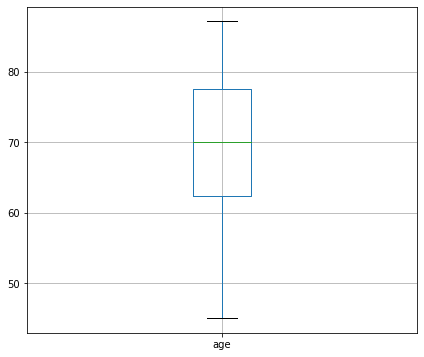

In [315]:
#age
plt.figure(figsize=(7,6))
new.boxplot(column=['age'])
plt.show()

In [316]:
print('mean age : ', round(new['age'].mean(), 2))
print('range of age : ', round(new['age'].max(), 2), "~", round(new['age'].min(), 2))

mean age :  69.26
range of age :  87.13 ~ 45.08


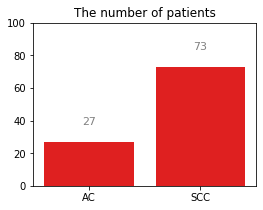

In [317]:
#histology
numAC = 0; numSCC = 0
for i in range(len(new)):
    if new['Histology'][i] == 'adenocarcinoma':
        numAC += 1
    elif new['Histology'][i] == 'squamous cell carcinoma':
        numSCC += 1
        
nameHist = ["AC", "SCC"]
numHist = [numAC, numSCC]
plt.figure(figsize=(4, 3))
plt.title('The number of patients')

g=sns.barplot(nameHist, numHist, color=("red"))
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
                ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                    textcoords='offset points')
_ = g.set_ylim(0,100) #To make space for the annotations

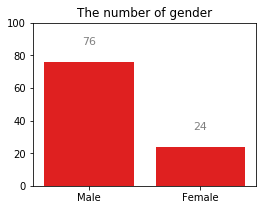

In [318]:
#gender
numMale = 0; numFemale = 0
for i in range(len(new)):
    if new['gender'][i] == 'male':
        numMale += 1
    elif new['gender'][i] == 'female':
        numFemale += 1
        
nameGen = ["Male", "Female"]
numGen = [numMale, numFemale]
plt.figure(figsize=(4, 3))
plt.title('The number of gender')

g=sns.barplot(nameGen, numGen, color=("red"))
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
                ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                    textcoords='offset points')
_ = g.set_ylim(0,100) #To make space for the annotations

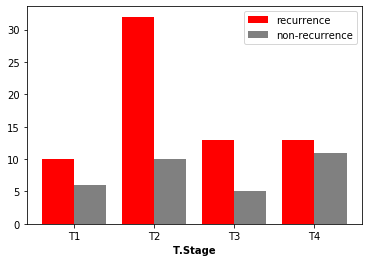

In [319]:
#N-stage distribution
t1re = 0; t1non = 0; t2re = 0; t2non = 0; t3re = 0; t3non = 0; t4re = 0; t4non = 0;

def getTRecur(stage, i):
    global t1re; global t1non; global t2re; global t2non; 
    global t3re; global t3non; global t4re; global t4non; 
    if (stage == '1.0') & (new['recurrence'][i] == 0):
        t1non += 1
    elif (stage == '1.0') & (new['recurrence'][i] == 1):
        t1re += 1
    elif (stage == '2.0') & (new['recurrence'][i] == 0):
        t2non += 1
    elif (stage == '2.0') & (new['recurrence'][i] == 1):
        t2re += 1
    elif (stage == '3.0') & (new['recurrence'][i] == 0):
        t3non += 1
    elif (stage == '3.0') & (new['recurrence'][i] == 1):
        t3re += 1
    elif (stage == '4.0') & (new['recurrence'][i] == 0):
        t4non += 1
    elif (stage == '4.0') & (new['recurrence'][i] == 1):
        t4re += 1
        
for i in range(len(new)):
    if new['clinical.T.Stage'][i] == 1.0:
        getTRecur(str(new['clinical.T.Stage'][i]), i)
    elif new['clinical.T.Stage'][i] == 2.0:
        getTRecur(str(new['clinical.T.Stage'][i]), i)
    elif new['clinical.T.Stage'][i] == 3.0:
        getTRecur(str(new['clinical.T.Stage'][i]), i)
    elif new['clinical.T.Stage'][i] == 4.0:
        getTRecur(str(new['clinical.T.Stage'][i]), i)

#print(t1re,t1non, t2re, t2non, t3re, t3non, t4re, t4non)        
        
xticks = ['T1','T2','T3', 'T4']
tNum = np.array([[t1re, t1non],[t2re,t2non],[t3re,t3non],[t4re,t4non]])
colors = ['red','grey']
names = ["recurrence", "non-recurrence"]

fig, ax = plt.subplots()

x = np.arange(len(tNum))
ax.bar(x-0.2, tNum[:,0], color=colors[0], width=0.4, label=names[0])
ax.bar(x+0.2, tNum[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.xlabel('T.Stage', fontweight = 'bold')
plt.show()

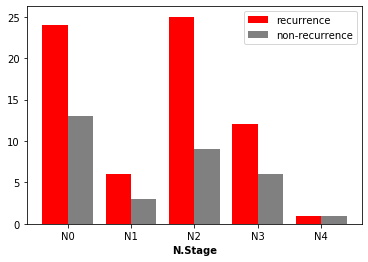

In [320]:
#N-stage distribution
n0re = 0; n0non = 0; n1re = 0; n1non = 0; n2re = 0; n2non = 0; n3re = 0; n3non = 0; n4re = 0; n4non = 0;

def getNRecur(stage, i):
    global n0re; global n0non; global n1re; global n1non;  
    global n2re; global n2non; global n3re; global n3non;
    global n4re; global n4non;
    if (stage == '0') & (new['recurrence'][i] == 0):
        n0non += 1
    elif (stage == '0') & (new['recurrence'][i] == 1):
        n0re += 1
    elif (stage == '1') & (new['recurrence'][i] == 0):
        n1non += 1
    elif (stage == '1') & (new['recurrence'][i] == 1):
        n1re += 1
    elif (stage == '2') & (new['recurrence'][i] == 0):
        n2non += 1
    elif (stage == '2') & (new['recurrence'][i] == 1):
        n2re += 1
    elif (stage == '3') & (new['recurrence'][i] == 0):
        n3non += 1
    elif (stage == '3') & (new['recurrence'][i] == 1):
        n3re += 1
    elif (stage == '4') & (new['recurrence'][i] == 0):
        n4non += 1
    elif (stage == '4') & (new['recurrence'][i] == 1):
        n4re += 1
        
for i in range(len(new)):
    if new['Clinical.N.Stage'][i] == 0:
        getNRecur(str(new['Clinical.N.Stage'][i]), i)
    elif new['Clinical.N.Stage'][i] == 1:
        getNRecur(str(new['Clinical.N.Stage'][i]), i)
    elif new['Clinical.N.Stage'][i] == 2:
        getNRecur(str(new['Clinical.N.Stage'][i]), i)
    elif new['Clinical.N.Stage'][i] == 3:
        getNRecur(str(new['Clinical.N.Stage'][i]), i)
    elif new['Clinical.N.Stage'][i] == 4:
        getNRecur(str(new['Clinical.N.Stage'][i]), i)

#print(n0re, n0non,n1re, n1non, n2re, n2non, n3re, n3non, n4re, n4non)        
        
xticks = ['N0', 'N1','N2','N3', 'N4']
nNum = np.array([[n0re, n0non],[n1re, n1non],[n2re,n2non],[n3re,n3non],[n4re,n4non]])
colors = ['red','grey']
names = ["recurrence", "non-recurrence"]

fig, ax = plt.subplots()

x = np.arange(len(nNum))
ax.bar(x-0.2, nNum[:,0], color=colors[0], width=0.4, label=names[0])
ax.bar(x+0.2, nNum[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.xlabel('N.Stage', fontweight = 'bold')
plt.show()